In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


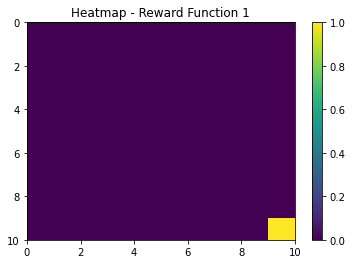

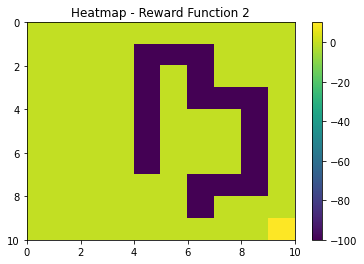

In [3]:
reward1 = np.zeros((10,10))
reward1[9][9] = 1
plt.pcolor(reward1)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap - Reward Function 1")
plt.show()

reward2 = np.zeros((10,10))
reward2[9][9]=10
reward2[1][5]=reward2[1][6]= -100
for i in [1,2,3,4,5,6]:
    reward2[i][4]=-100
reward2[2][6]= -100
reward2[3][6]= -100
reward2[3][7]= -100
reward2[3][8]=-100
for i in [4,5,6,7]:
    reward2[i][8]=-100
reward2[7][6]= -100 
reward2[7][7]= -100
reward2[8][6]= -100
plt.pcolor(reward2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap - Reward Function 2")
plt.show()


# Question 2&3

In [4]:
state_space = np.tile(np.arange(0, 100, 10), (10, 1)) + np.arange(0, 10, 1).reshape((10, 1))
discount_factor = 0.8
random_probability = 0.1
cur_reward = reward_1
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
all_actions = [UP, DOWN, LEFT, RIGHT]

NameError: name 'reward_1' is not defined

In [5]:

def state_to_coordinate(state, state_sets=state_space):
    y, x = np.where(state_sets == state)
    return (x[0], y[0])

def coordinate_to_state(coordinate_x, coordinate_y, state_sets=state_space):
    return state_sets[coordinate_y, coordinate_x]

def get_valid_actions(state):
    valid_actions = all_actions.copy()
    x, y = state_to_coordinate(state)
    if x == 0:
        valid_actions.remove(LEFT)
    elif x == 9:
        valid_actions.remove(RIGHT)
    if y == 0:
        valid_actions.remove(UP)
    elif y == 9:
        valid_actions.remove(DOWN)
    return valid_actions

def get_next_states_probabilities(cur_state, cur_action):
    cur_valid_actions = get_valid_actions(cur_state)
    next_probabilities = [0] * 5 # Order UP, DOWN, LEFT, RIGHT, STAY
    for action in cur_valid_actions: # w/4 for states inside the grid
            next_probabilities[action] = random_probability / 4
    
    # Calculate the transition probabilities for an action
    if (len(cur_valid_actions) == 4): # No boundary cases
        next_probabilities[cur_action] += 1 - random_probability
        next_probabilities[4] = 0 # Probability to state in the current state is 0
    
    else: # With probability to move out the grid
        next_probabilities[4] = random_probability * (1 - len(cur_valid_actions) / 4)
        if cur_action in cur_valid_actions:
            next_probabilities[cur_action] += 1 - random_probability
        else:
            next_probabilities[4] += 1 - random_probability
    
    return next_probabilities

def state_reward(state, reward_function):
    x, y = state_to_coordinate(state)
    return reward_function[y, x]

def get_state_value_function(reward_function):
    # Initialize
    state_value_function = np.zeros((10, 10))
    delta = 1 # Exit flag

    while delta > 0.01:
        delta = 0 
        previous_state_value_function = state_value_function.copy()
        # Loop over 100 states
        for cur_state in range(100): 
            cur_x, cur_y = state_to_coordinate(cur_state)
            previous_state_value = previous_state_value_function[cur_y, cur_x]
            state_value_all_actions = [0] * 4

            # Loop over all actions
            for cur_action in all_actions:
                transition_probabilities = get_next_states_probabilities(cur_state, cur_action) 

                # Sum over one action
                for prob_idx in range(len(transition_probabilities)):
                    prob = transition_probabilities[prob_idx]
                    if (prob != 0): # Remove invalid case
                        # Next state coordinate
                        next_x = cur_x
                        next_y = cur_y
                        if prob_idx == 0: # Move up
                            next_y -= 1
                        elif prob_idx == 1: # Move down
                            next_y += 1
                        elif prob_idx == 2: # Move left
                            next_x -= 1
                        elif prob_idx == 3: # Move right
                            next_x += 1
                        else: # Stay in the state
                            pass
                        next_state = coordinate_to_state(next_x, next_y)
                        state_value_all_actions[cur_action] += prob * (state_reward(next_state, reward_function) + 
                                                                       discount_factor * previous_state_value_function[next_y, next_x])

            cur_state_value = max(state_value_all_actions)
            state_value_function[cur_y, cur_x] = cur_state_value
            delta = max(delta, abs(previous_state_value - cur_state_value)) 
    return state_value_function



In [6]:
from matplotlib.colors import ListedColormap

def plot_optimal_value_map(table,title=""):
    plt.pcolor(table, cmap=ListedColormap(['white']), edgecolors='black')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(title)
    for y in range(table.shape[0]):
        for x in range(table.shape[1]):
            if(table[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % table[y, x],
                horizontalalignment='center',
                verticalalignment='center', fontsize=7.5)
            else:
                plt.text(x + 0.5, y + 0.5, '%.2f' % table[y, x],
                    horizontalalignment='center',
                    verticalalignment='center', fontsize=7.5)
    plt.show()

plot_optimal_value_map(state_value_function_1)

NameError: name 'state_value_function_1' is not defined

In [7]:
def plot_heat_map(heat_array, title):
    min_value = np.min(heat_array)
    max_value = np.max(heat_array)
    plt.pcolor(heat_array)
    plt.ylim(top=0, bottom=10)
    plt.xlim(left=0, right=10)
    plt.colorbar()
    plt.title(title)
    plt.show()
state_value_function_1 = get_state_value_function(reward1)
print('Optimal value of states: ')
pd.set_option('precision', 3)
plot_heat_map(state_value_function_1, 's')# , 'Heat map of state values using reward function 1')

NameError: name 'all_actions' is not defined

# Question 5

In [8]:


# policy function
def print_optimal_policy_with_arrows(optimal_policy_function):
    optimal_policy_symbols = np.chararray((10, 10), unicode=True)
    #arrow_symbols = ['⇧','⇩','⇦','⇨']
    arrow_symbols = ['↑','↓','←','→']
    for i in range(4):
        optimal_policy_symbols[optimal_policy_function == i] = arrow_symbols[i]
    print(pd.DataFrame(optimal_policy_symbols))
    

def get_optimal_policy_function(state_value_function, reward_function):
    # Initialize
    optimal_policy_function = np.zeros((10, 10))

    # Loop all states
    for cur_state in range(100):  
        cur_x, cur_y = state_to_coordinate(cur_state)
        state_value_all_actions = [0] * 4

        # Loop over all actions
        for cur_action in all_actions:
            transition_probabilities = get_next_states_probabilities(cur_state, cur_action) 

            # Sum over one action
            for prob_idx in range(len(transition_probabilities)):
                prob = transition_probabilities[prob_idx]
                if (prob != 0): # Remove invalid case
                    # Next state coordinate
                    next_x = cur_x
                    next_y = cur_y
                    if prob_idx == 0: # Move up
                        next_y -= 1
                    elif prob_idx == 1: # Move down
                        next_y += 1
                    elif prob_idx == 2: # Move left
                        next_x -= 1
                    elif prob_idx == 3: # Move right
                        next_x += 1
                    else: # Stay in the state
                        pass
                    next_state = coordinate_to_state(next_x, next_y)
                    state_value_all_actions[cur_action] += prob * (state_reward(next_state, reward_function) + discount_factor * state_value_function[next_y, next_x])
        
        #state_value_all_actions = np.around(state_value_all_actions, 3) # Round the value to 5 dicimal5
        optimal_action = np.argmax(state_value_all_actions)
        optimal_policy_function[cur_y, cur_x] = optimal_action
        #print('State: ', cur_state)
        #print(state_value_all_actions)
    return optimal_policy_function.astype(int)

optimal_policy_function_1 = get_optimal_policy_function(state_value_function_1, reward1)
print('Optimal policy using arrows: ')
print_optimal_policy_with_arrows(optimal_policy_function_1)

NameError: name 'state_value_function_1' is not defined

# Question 6

In [9]:
state_value_function_2 = get_state_value_function(reward2)
print('Optimal value of states: ')
pd.set_option('precision', 3)
plot_optimal_value_map(state_value_function_2)


NameError: name 'all_actions' is not defined

# Question 7

In [10]:
plot_heat_map(state_value_function_2, 's')# , 'Heat map of state values using reward function 1')

NameError: name 'state_value_function_2' is not defined

# Question 9

In [11]:
optimal_policy_function_2 = get_optimal_policy_function(state_value_function_2, reward2)
print('Optimal policy using arrows: ')
print_optimal_policy_with_arrows(optimal_policy_function_2)

NameError: name 'state_value_function_2' is not defined